<a href="https://colab.research.google.com/github/gdarias1987/Datascients-Coderhouse/blob/main/Entrega1Arias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final
## Utilización de Machine Learning para Clasificación Binaria

Presentación N° 1

Integrante: Guillermo Daniel Arias 

Fecha: 2021-11-29

Camada: 16315


# Introducción
La tecnología de Machine Learning (ML) ha tomado mucha fuerza en los últimos años y ha logrado ser utilizada en múltiples escenarios para afrontar problemas. 
Uno de los mayores problemas que permite resolver las tecnologías de ML, es la clasificación. 
Las clasificaciones pueden ser binarias o de clases múltiples.
Este proyecto final pretende abordar la clasificación binaria de un conjunto de datos.


# Objetivo
El dataset comprende un listado de pokemons y sus características principales. 

El objetivo del proyecto será poder clasificar de una base de datos de pokemons, aquellos que son Legendarios.
Para lograr dicho cometido, la última columna del dataset contiene el dato que corresponde a si un pokemon es Legendario o no. 

Con la información provista, se propone utilizar las características anteriormente comentadas, para lograr determinar si el pokemon analizado es Legendario o no. 

# Conformación equipo de trabajo
Soy integrante único del proyecto.

# Fuente del Dataset
Para este proyecto se utilizará un dataset obtenido de la página Kaggle 
(Link a base de datos original).

# Data Acquisition
Para la obtención del dataset se buscaron aquellos que tengan como “target” clasificación binaria, y además, se encontrasen en sitios opensource (free to use).
Los sitios consultados fueron:


Kaggle: https://www.kaggle.com/datasets

Google Research: https://datasetsearch.research.google.com/

Data.gov: https://www.data.gov/

Se tomó la decisión de utilizar el dataset de Pokemon debido a la variedad de tipos de datos que dispone el dataset y por afinidad con la temática.


# Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import pandas_profiling
pio.templates.default = "plotly_dark"

In [ ]:
!pip install pandas-profiling==2.7.1
!pip install plotly==5.2.1

## CARGA DATAFRAME

In [ ]:
url = 'https://drive.google.com/file/d/18SCNs5SHVsG8YEldwt44euatPXiYwlAE/view?usp=sharing'

file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)
# df = df.dropna()
df_aux = df

In [ ]:
df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## ANALISIS EXPLORATORIO

### METODO LARGO

#### SHAPE

In [ ]:
df.shape

(800, 13)

#### TOTALIDAD DE REGISROS POR COLUMNA

In [ ]:
df.count().to_frame().T

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,800,800,800,414,800,800,800,800,800,800,800,800,800


#### TIPOS DE DATOS POR COLUMNA

In [ ]:
df.dtypes.to_frame().T

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,int64,object,object,object,int64,int64,int64,int64,int64,int64,int64,int64,bool


#### ESTRUCTURA DEL DATASET

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.columns.to_frame().T


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


### METODO CORTO

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### Data Wrangling

#### *Columna* "#" 
Esta columna tiene un valor numérico con valores repetidos. 

Significa que algunos pokemons comparten el mismo valor de la clave "#", como se puede ver a continuación:


In [ ]:
df["#"].value_counts().head()

479    6
386    4
711    4
710    4
150    3
Name: #, dtype: int64

##### EJEMPLO
Se listan los 3 primeros casos

In [ ]:
labels = df["#"].value_counts().keys()

for i in range(3):
  print(df[df["#"]== labels[i]])

       #              Name    Type 1  ... Speed  Generation  Legendary
531  479             Rotom  Electric  ...    91           4      False
532  479   RotomHeat Rotom  Electric  ...    86           4      False
533  479   RotomWash Rotom  Electric  ...    86           4      False
534  479  RotomFrost Rotom  Electric  ...    86           4      False
535  479    RotomFan Rotom  Electric  ...    86           4      False
536  479    RotomMow Rotom  Electric  ...    86           4      False

[6 rows x 13 columns]
       #                 Name   Type 1  ... Speed  Generation  Legendary
428  386   DeoxysNormal Forme  Psychic  ...   150           3       True
429  386   DeoxysAttack Forme  Psychic  ...   150           3       True
430  386  DeoxysDefense Forme  Psychic  ...    90           3       True
431  386    DeoxysSpeed Forme  Psychic  ...   180           3       True

[4 rows x 13 columns]
       #                   Name Type 1  ... Speed  Generation  Legendary
784  711  Gourgeist

#### *Columna* "Type 2" 
Se identifica que en la columna "Type 2" hay campos null.
**texto en negrita**
Se realizó un análisis particular de los valores que puede tomar “Type 2”:

In [ ]:
pd.DataFrame(df["Type 2"].describe()).reset_index()

,index,Type 2
0,count,414
1,unique,18
2,top,Flying
3,freq,97


Se puede visualizar que de 800 valores que tienen las demás columnas, esta tiene solo 414. 

Comprendiendo en profundidad, la variable representa una segunda clasificación del tipo de pokemon. 
Se decide reemplazar los valores null, por el carácter “-”.


In [ ]:
def fixNaN(x):
  if(type(x)==float):
    return "-"
  else:
    return x

In [ ]:
df["Type 2"] = df["Type 2"].apply(lambda x: fixNaN(x))

#### Renombrado de Columnas
Se decidió renombrar algunas columnas


In [ ]:
df.rename(columns={"#":"Index", "Type 2": "type_2", "Type 1": "type_1"}, inplace=True)

#### Variable Target

Esta columna es del tipo booleana. 
Para poder realizar el análisis, se procede a transformar la variable es categórica y numérica.


In [ ]:
df["TargetInt"] = df.Legendary.apply(lambda x: 1 if x else 0)
df["Legendary"] = df.Legendary.apply(lambda x: "Si" if x else "No")

In [ ]:
df.head()

,Index,Name,type_1,type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,TargetInt
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,No,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,No,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,No,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,No,0
4,4,Charmander,Fire,-,309,39,52,43,60,50,65,1,No,0


### ANALISIS UNIVARIADO

In [ ]:
# SOLO PARA ANALISIS EXTRA
# for column in df.columns:
#   if column != "Index":
#     fig = px.histogram(df, 
#                     x=column,
#                     color=column
#                     )
#     fig.show()

#### COLUMNA "type_1"

Se elige visualizar esta columna debido que son las clasificaciones basicas de cada pokemon. 

Ej: 
* Grass/Hierba 
* Fire/Fuego
* Water/Agua

In [ ]:
fig = px.histogram(df, 
                   x="type_1",
                   histnorm="probability",
                   labels = dict(count="A", type_1="Type 1"),
                   title="Distribución porcentual de Type 1"
                   )
fig.show()

In [ ]:
fig = px.histogram(df, 
                   x="type_1",
                   color="type_1",
                   labels = dict(count="A", type_1="Type 1"),
                   title="Distribución porcentual de Type 1"
                   )
fig.show()

Se puede notar que los pokemon de agua y normales son los mas comunes.

#### COLUMNA "type_2"

Se elige visualizar esta columna debido que son las clasificaciones secundarias de cada pokemon. 

No todos los pokemons tienen esta segunda clasificación. Se hizo trabajo previo, reemplazando los "nulls" por el caracter "-"

In [ ]:
fig = px.histogram(df, 
                   x="type_2",
                   histnorm='probability',
                   labels = dict(count="A", type_2="Type 2"),
                   title="Distribución porcentual de Type 2"
                   )
fig.show()

In [ ]:
fig = px.histogram(df, 
                   x="type_2",
                   color="type_2",
                   labels = dict(count="A", type_2="Type 2"),
                   title="Distribución de Type 2"
                   )
fig.show()

Se puede visualizar que mas del 48% de los pokemons no tienen esta clasificación secundaria.

Siendo las clasificaciones de voladores los mas comunes.

#### COLUMNA "Generation"

Se elige visualizar esta columna debido que indican a que generación pertenecen los pokemons. 



In [ ]:
fig = px.histogram(df, 
                   x="Generation",
                   histnorm='probability',
                   labels = dict(count="A", Generation="Generation"),
                   title="Distribución porcentual de Generation"
                   )
fig.show()

In [ ]:
fig = px.histogram(df, 
                   x="Generation",
                   color="Generation",
                   labels = dict(count="A", Generation="Generation"),
                   title="Distribución de Generation"
                   )
fig.show()

Se pueden visualizar 3 generaciones con mas pokemons, siendo la numero 1, 3 y 5.

#### COLUMNA "Legendary"
Se elige visualizar esta columna debido que permite visualizar la distribución de pokemons Lengedarios dentro del dataframe



In [ ]:
fig = px.histogram(df, 
                   x="Legendary",
                   histnorm='probability',
                   labels = dict(count="A", Legendary="Legendary"),
                   title="Distribución porcentual de Legendary"                   
                   )
fig.show()

In [ ]:
fig = px.histogram(df, 
                   x="Legendary",
                   color="Legendary",
                   labels = dict(count="A", Legendary="Legendary"),
                   title="Distribución porcentual de Legendary" 
                   )
fig.show()

Se puede visualizar que la variable "target" esta desbalanceada. Hay solo un %8,125 de pokemons Legendarios, siendo 65 de 800 pokemons.

### ANALISIS BIVARIADO

#### Matriz de Correlación

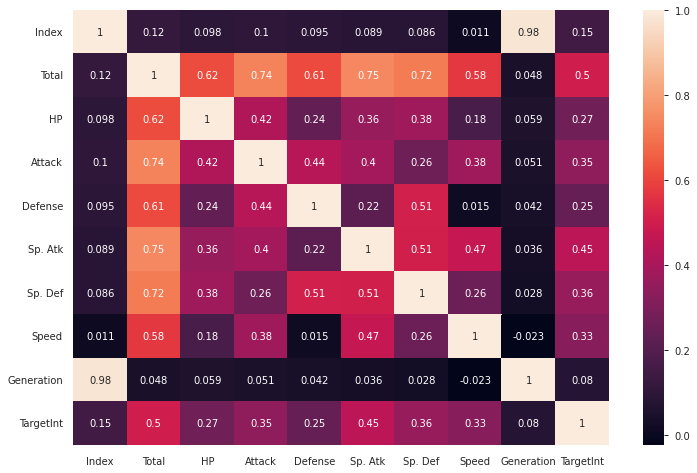

In [ ]:
plt.figure(figsize=(12, 8))

vg_corr = df.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

Del heatmap se desprende que no hay una que no hay una gran correlacion entre los atributos de los pokemons.

Se pueden visualizar las correlaciones mas significativas (mayor a 0.7) entre "Total" y los atributos "Special Attack", "Attack", "Special Defense".

#### Analisis entre columna "Attack" y "Defense"
Se elige visualizar estas dos columnas para buscar la relación entre el nivel de ataque y defense de los pokemons.

In [ ]:
fig = px.scatter(
    df, 
    x="Attack", 
    y="Defense",
    hover_name="Name",
    trendline="ols",
    trendline_scope = 'overall',
    trendline_color_override = 'green',
    labels = dict(count="A", Legendary="Legendary"),
    title="Relación entre Attack y Defense" 
)
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Se puede visualizar una correlación media entre el ataque y defensa.

#### Analisis entre columna "Attack" y "Total"

Se elige visualizar estas dos columnas para buscar la relación entre el nivel de ataque y el nivel total de los pokemons.

In [ ]:
fig = px.scatter(
    df, 
    x="Attack", 
    y="Total",
    hover_name="Name",
    trendline="ols",
    trendline_scope = 'overall',
    trendline_color_override = 'green',
    title="Relación entre Attack y Defense" 
    )
fig.show()

Se puede visualizar una correlación media-alta entre el ataque y el nivel total.

#### Analisis entre columna "Special Attack" y "Total"

Se elige visualizar estas dos columnas para buscar la relación entre el nivel de ataque especial y nivel total de los pokemons.

In [ ]:
fig = px.scatter(
    df, 
    x="Sp. Atk", 
    y="Total",
    hover_name="Name",
    trendline="ols",
    trendline_scope = 'overall',
    trendline_color_override = 'green',
    title="Relación entre Special Attack y Defense" 
    )
fig.show()

Se puede visualizar una correlación media-alta entre el ataque especial y el nivel total.

#### Analisis entre columna "Special Defense" y "Total"
Se elige visualizar estas dos columnas para buscar la relación entre el nivel de defensa especial y nivel total de los pokemons.

In [ ]:
fig = px.scatter(
    df, 
    x="Sp. Def", 
    y="Total",
    hover_name="Name",
    trendline="ols",
    trendline_scope = 'overall',
    trendline_color_override = 'green',
        title="Relación entre Special Defense y Total" 
)
fig.show()

Se puede visualizar una correlación media-alta entre la defensa especial y el nivel total.

#### Analisis entre columna "Special Attack" y "Special Defense"
Se elige visualizar estas dos columnas para buscar la relación entre el nivel de ataque especial y el valor total de los pokemons.

In [ ]:
fig = px.scatter(
    df, 
    x="Sp. Atk", 
    y="Total",
    hover_name="Name",
    trendline="ols",
    trendline_scope = 'overall',
    trendline_color_override = 'green',
            title="Relación entre Special Defense y Special Attack" 

)
fig.show()

Se puede visualizar una correlacion media (>0,55) entre Total y Ataque Especial. 
Con la propiedad Color de Plotly se puede visualizar la distribución de pokemons Legendarios dentro del scatter.


### ANALISIS MULTIVARIADO

#### Analisis entre columna "Attack", "Defense", "Total" y "Legendary"

In [ ]:
fig = px.scatter(df, 
                 title="Correlación entre Attack y Defense. Identificando pokemons legendarios</br></br> y nivel Total visualizado en el tamaño de cada pokemon.",
                 x="Attack",
                 y="Defense",
                 hover_name="Name",
                 color='Legendary',
                 size='Total',
                 trendline="ols",
                 trendline_scope = 'overall',
                 )
fig.show()

Se muestra la correlación entre Attack y Defense, ahora ampliando el analisis al clasificar por el valor "Legendary" y tamaño representa el valor de "Total".

#### Analisis entre columna "Attack", "Total" y "Legendary"

In [ ]:
fig = px.scatter(df, 
                 title="Correlación entre Attack y Total. Identificando pokemons legendarios.",
                 x="Attack",
                 y="Total",
                 hover_name="Name",
                 color='Legendary',
                #  size='HP',
                 trendline="ols",
                 trendline_scope = 'overall',
                 )
fig.show()

Se puede visualizar que los pokemons legendarios se encuentran ubicados en valores "Total" a partir de los 580. En el caso de "Attack" los valores comienzan de los 50 en adelante. 

#### Analisis entre columna "Special Attack", "Total" y "Legendary"

In [ ]:
  fig = px.scatter(df, 
                 title="Correlación entre Special Attack y Total. Identificando pokemons legendarios.",
                 x="Sp. Atk", 
                 y="Total",
                 hover_name="Name",
                 color='Legendary',
                #  size='HP',
                 trendline="ols",
                #  trendline_scope = 'overall',
                 )
fig.show()  

En esta ocasión se apertura la linea de tendencia para entender cual es el R² para los pokemons Lengendarios, notando que tiene un R² menor a los pokemons no legendarios. 

#### Analisis entre columna "Special Defense", "Total" y "Legendary"



In [ ]:
  fig = px.scatter(df, 
                 title="Correlación entre Special Defense y Total. Identificando pokemons legendarios.",
                 x="Sp. Def", 
                 y="Total",
                 hover_name="Name",
                 color='Legendary',
                #  size='HP',
                 trendline="ols",
                 trendline_scope = 'overall',
                 )
fig.show()  

Se puede visualizar que los valores "Special Defense" que toman los pokemons legendarios varian desde 20 a casi 200. 

#### Analisis entre columnas "Special Attack", "Special Defense" y "Legendary" 

In [ ]:
fig = px.scatter(df, 
                 title="Correlación entre Special Attack y Special Defense. </br></br>Clasificando pokemons legendarios y 'HP' representando el tamaño.",
                 x="Sp. Def", 
                 y="Sp. Atk",
                 hover_name="Name",
                 color='Legendary',
                 size='HP',
                 trendline="ols",
                 trendline_scope = 'overall',
                 )
fig.show()  

Se visualiza la correlación entre Special Attack y Special defense, clasificando los pokemons por "Legendary" y "HP" representando el tamaño.